# The Collatz Conjecture

## The Task
The problem is to prove that if you start with any positive integer x and repeatedly apply the function f(x) below, you always get stuck in the repeating sequence 1, 4, 2, 1, 4, 2, . . .
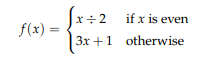

For example, if we started with the number 20 the sequence would be: [20, 10, 5, 16, 8, 4, 2, 1, 4, 2, 1, ...]

The Task is to verify the first positive 10,000 integers result in that sequence with this function.

$$
f(x) = 
$$

## Proving the conjecture

In [1]:
def collatzSequence(n):
    sequenceList = [n] #Store the sequence as a list
    while n != 1: #If we end up at number 1, the sequence loop of 4, 2, 1 happens so we return
        if n % 2 == 0:
            n = n / 2
        else:
            n = (3 * n) + 1
        sequenceList.append(n) #Add current number to the sequence
    return sequenceList

isConjectureTrue = True;
for i in range(1, 10001): #Loop through numbers 1 to 10000 inclusive
    sequenceList = collatzSequence(i)
    if sequenceList[-1] != 1: #Sequence[-1] is the last number in the sequence
        print(f"Collatz conjecture is not true, the number {i} didn't end in the 4, 2, 1 sequence")
        isConjectureTrue = False

if isConjectureTrue:
    print("Collatz conjecture passes for all numbers up to 10000, This proves the conjecture is true")

Collatz conjecture passes for all numbers up to 10000, This proves the conjecture is true


This code takes every number between 1 to 10000 and passes it through the collatz sequence. If the sequence ends at 1, it stops running and returns the method since it then starts the [4, 2, 1] sequence loop.

*When running the code, you can see that all numbers up to 10000 pass this conjecture.*

# Calculating Square Roots

## The Task

you should write a function sqrt(x) to approximate the square root of a floating point number x without
using the power operator or a package.
Rather, you should use the Newton’s method. Start with an initial guess for the square root called z0. You then repeatedly
improve it using the following formula, until the difference between some previous guess zi and the next zi+1
is less than some threshold, say 0.01.

$$
z_{i+1} = z_i - \frac{z_i\times z_i-x}{2z_i}
$$

## Calculating the square root

In [2]:
import random;

def sqrt(x):
    threshold = 0.01
    previousGuess = random.random()*100; #Random number between 1 and 100
    while True:        
        newGuess = previousGuess-((previousGuess*previousGuess - x) / (2*previousGuess))
        if newGuess >= previousGuess - threshold and newGuess <= previousGuess + threshold:
            return newGuess
        previousGuess = newGuess;
    
sqrtNumber = 12525; #The number we are getting the square root of
    
print(f"Square root of {sqrtNumber}: {sqrt(sqrtNumber)}")

Square root of 12525: 111.91514650480887


This code generates a random number zi between 1 and 100 and runs the formula given to get zi+1. Then it checks if zi+1 is within the 0.01 threshold of zi. If it is within the threshold, it returns zi+1 as the answer, if not then we run the function again until it is.

# Reverse Engineering Functions

## The Task
Consider all possible functions taking four bits as input and outputting a single bit. How many such possible functions are there? 

Write Python code to select one such function at random out of all the possibilities. Suppose the only way you can figure out what the function is, is by calling it with different inputs and checking the outputs. How many times do you need to call the function to be certain which function it is?


## Calculating the possible functions

First lets generate a random function. There is 4 input bits, and 1 output bit, a bit can only have 2 values so there is 2^4 different inputs for this function. Since the output is 1 bit, there are only 2 ouputs we can get so the list of possible functions goes to 2^16 which is 65536.

In [16]:
import random
import itertools as it

#Generate a random one of 2^16 (65536) functions
random_function_int = random.randint(0, 65535)

def generateRandomFunction(input_bits, function):
    input_value = int("".join(str(bit) for bit in input_bits), 2)#format from list of bits to integer
    
    #Shift the value of function by the input_value (which is the equivalent of dividing it by 2^input_value)
    #Then get the remainder of the division and assign it to the output bit
    output_bit = (function >> input_value) & 1
    return output_bit

Using itertools we can get outputs for all combinations of the 4 bits

In [17]:
def getFunctionOutputs(random_function_int):
    for inputs in it.product([0, 1], repeat=4):
        output_bit = generateRandomFunction(inputs, random_function_int)
        print(f"Input: {inputs}, Output: {output_bit}")

getFunctionOutputs(random_function_int) 

Input: (0, 0, 0, 0), Output: 1
Input: (0, 0, 0, 1), Output: 1
Input: (0, 0, 1, 0), Output: 0
Input: (0, 0, 1, 1), Output: 1
Input: (0, 1, 0, 0), Output: 0
Input: (0, 1, 0, 1), Output: 1
Input: (0, 1, 1, 0), Output: 1
Input: (0, 1, 1, 1), Output: 0
Input: (1, 0, 0, 0), Output: 0
Input: (1, 0, 0, 1), Output: 0
Input: (1, 0, 1, 0), Output: 0
Input: (1, 0, 1, 1), Output: 1
Input: (1, 1, 0, 0), Output: 0
Input: (1, 1, 0, 1), Output: 1
Input: (1, 1, 1, 0), Output: 0
Input: (1, 1, 1, 1), Output: 1


## Conclusion
As you can see from the output, there is no pattern we can follow to know what the function is without brute forcing all possbile combinations. If we knew the function was balanced or constant we could shorten the number of combinations needed to figure out what the function does. 
### Constant 
A constant function means that all the outputs are going to be 0 or 1. This means we only need to check one combination to get all the possible results of the function.
### Balanced
A balanced function means half of the results are 1 and the other half is 0. So we need to only run combinations until we have half the possible results as either 1 or 0

## Another implementation 

In [5]:
import random
import itertools as it

In [6]:
def create_f():
    outputs = [random.choice([0, 1]) for _ in range(17)]
    def f(x1, x2, x3, x4):
        i = x1 * 2**3 + x2 * 2**2 + x3 + 2**1 + x4 * 2**0
        return outputs[i]
    return f


In [7]:
my_f = create_f()

In [8]:
for inputs in it.product([0, 1], repeat=4):
    print(f"Input: {inputs}, Output: {my_f(*inputs)}")

Input: (0, 0, 0, 0), Output: 1
Input: (0, 0, 0, 1), Output: 0
Input: (0, 0, 1, 0), Output: 0
Input: (0, 0, 1, 1), Output: 1
Input: (0, 1, 0, 0), Output: 1
Input: (0, 1, 0, 1), Output: 1
Input: (0, 1, 1, 0), Output: 1
Input: (0, 1, 1, 1), Output: 0
Input: (1, 0, 0, 0), Output: 1
Input: (1, 0, 0, 1), Output: 1
Input: (1, 0, 1, 0), Output: 1
Input: (1, 0, 1, 1), Output: 1
Input: (1, 1, 0, 0), Output: 1
Input: (1, 1, 0, 1), Output: 1
Input: (1, 1, 1, 0), Output: 1
Input: (1, 1, 1, 1), Output: 1
